# Introducción a las Series de Tiempo

## Configuración inicial

### Cargamos nuestras librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
from datetime import datetime

### Cargamos y preparamos los datos

In [3]:
df = pd.read_csv('./Data/AirPassengers.csv')

In [4]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

## Trabajando con Series de Tiempo

#### Ajustamos el formato de los datos

In [5]:
df['Month'] = pd.to_datetime(df['Month'])

#### Ajustamos el indice de nuestro dataset

In [6]:
df.set_index('Month', inplace=True)

In [7]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### Convertimos nuestro dataframe en una serie de tiempo

In [8]:
ts = df['#Passengers']

In [9]:
# Consultando por el indice
ts['1949-01-01']

112

In [10]:
# Consultar utilizando la libreria datetime
ts[datetime(1949,1,1)]

112

In [11]:
# Consultar un rango de fechas
ts['1949-01-01':'1949-12-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

In [12]:
# Traer un rango hasta una fecha concreta
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [13]:
# Traer todos los datos de un año
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64


## Estacionariedad

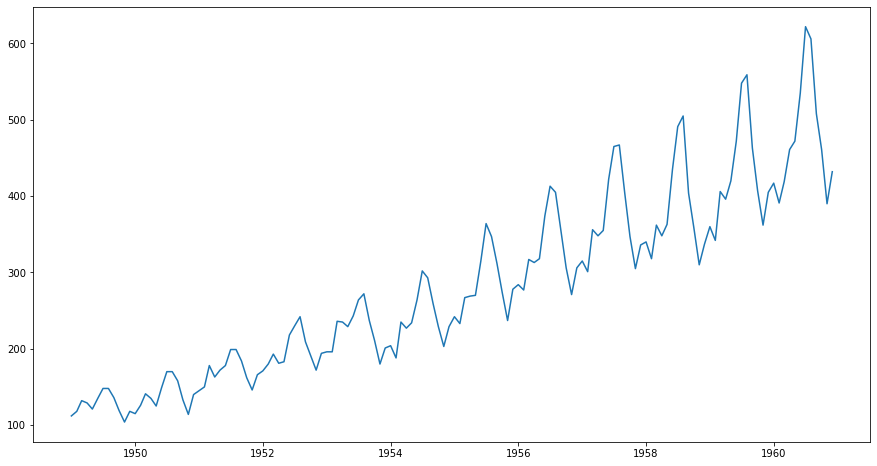

In [14]:
plt.figure(figsize=(15,8))
plt.plot(ts)

### El test de Dickey-Fuller

In [15]:
from statsmodels.tsa.stattools import adfuller

In [53]:
def rolling_MS(timeseries):
    rolmean = timeseries.rolling(12, center=True).mean()
    rolstd = timeseries.rolling(12, center=True).std()

    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label ='Media Movil')
    plt.plot(rolstd, color='green', label="Std Movil")
    plt.legend(loc='best')
    plt.title('Media Movil y Std Movil')

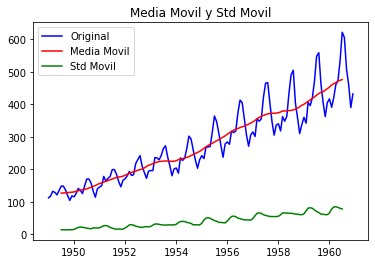

In [54]:
rolling_MS(ts)

In [73]:
def test_DF(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value',
                                             '# Lags',
                                             'Number of Observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
        
    print(dfoutput)

In [74]:
test_DF(ts)

Test Statistic              0.815369
p-value                     0.991880
# Lags                     13.000000
Number of Observations    130.000000
Critical value (1%)        -3.481682
Critical value (5%)        -2.884042
Critical value (10%)       -2.578770
dtype: float64


In [95]:
prub = pd.DataFrame(columns=['Const','Const y Tend', 'Const y Tend Cuad-Lin', 'Sin Const ni Tend'])


In [102]:
prub[0] = [1,2,4,5]

In [103]:
prub

,Const,Const y Tend,Const y Tend Cuad-Lin,Sin Const ni Tend,0
0,1,NaN,NaN,NaN,1
1,2,NaN,NaN,NaN,2
2,4,NaN,NaN,NaN,4
3,5,NaN,NaN,NaN,5


In [143]:
wf = pd.DataFrame(columns=['Const','Const y Tend', 'Const y Tend Cuad-Lin', 'Sin Const ni Tend'])

def test_DF2(timeseries):
    models = ['c', 'ct', 'ctt', 'nc']
    for i in range(4):
        dftest = adfuller(timeseries, autolag='AIC', regression=models[i])
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                                 'p-value',
                                                 '# Lags',
                                                 'Number of Observations'])
        for key, value in dftest[4].items():
            dfoutput['Critical value (%s)'%key] = value
        wf[i] = dfoutput
#     return(dfoutput)

In [144]:
prueba = test_DF2(ts)

In [146]:
wf

,Const,Const y Tend,Const y Tend Cuad-Lin,Sin Const ni Tend,0,1,2,3
Test Statistic,NaN,NaN,NaN,NaN,0.815369,-2.100782,-3.233678,2.390602
p-value,NaN,NaN,NaN,NaN,0.991880,0.545659,0.195942,0.997180
# Lags,NaN,NaN,NaN,NaN,13.000000,13.000000,13.000000,13.000000
Number of Observations,NaN,NaN,NaN,NaN,130.000000,130.000000,130.000000,130.000000
Critical value (1%),NaN,NaN,NaN,NaN,-3.481682,-4.030152,-4.462542,-2.583153
Critical value (5%),NaN,NaN,NaN,NaN,-2.884042,-3.444818,-3.878611,-1.943251
Critical value (10%),NaN,NaN,NaN,NaN,-2.578770,-3.147182,-3.581753,-1.614926


In [145]:
prueba

In [139]:
pd.DataFrame(prueba)

,0
Test Statistic,0.815369
p-value,0.991880
# Lags,13.000000
Number of Observations,130.000000
Critical value (1%),-3.481682
Critical value (5%),-2.884042
Critical value (10%),-2.578770


In [140]:
jumm = pd.DataFrame